# Long Short-Term Memory

In [1]:
DATASET_FILE = "../output/data/dataset.joblib"
OUTPUT_PATH = "../output/data/lstm"

TRAIN_RATIO = 0.70
VAL_RATIO = 0.20
TEST_RATIO = 0.10
RANDOM_STATE = 42

In [2]:
from keras import models, layers, optimizers, callbacks
from matplotlib import font_manager, pyplot as plt
from joblib import load
from pathlib import Path
from pandas import DataFrame
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from dataset_type import Dataset
import numpy as np

font_prop = font_manager.FontProperties(fname="../submodules/sarabun-font/fonts/Sarabun-Regular.ttf")

2025-03-24 09:18:56.696423: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-03-24 09:18:56.709044: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1742782736.723028 2158282 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1742782736.727537 2158282 cuda_blas.cc:1407] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
W0000 00:00:1742782736.738903 2158282 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking 

In [3]:
DATASET_FILE = Path(DATASET_FILE).resolve()
OUTPUT_PATH = Path(OUTPUT_PATH).resolve()
OUTPUT_PATH.mkdir(parents=True, exist_ok=True)

assert DATASET_FILE.is_file()

In [4]:
datasets: dict[str, Dataset] = load(DATASET_FILE)
results: dict[str, float | int] = []

In [5]:
def create_sequences(X, y, seq_len):
    X_seq, y_seq = [], []
    for i in range(len(X) - seq_len):
        X_seq.append(X[i:i + seq_len])
        y_seq.append(y[i + seq_len])

    return np.array(X_seq), np.array(y_seq)

Sequence Length: 1


I0000 00:00:1742782739.158169 2158282 gpu_device.cc:2019] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 2088 MB memory:  -> device: 0, name: NVIDIA GeForce RTX 3050 Laptop GPU, pci bus id: 0000:01:00.0, compute capability: 8.6


Epoch 1/100


I0000 00:00:1742782741.394319 2158459 service.cc:152] XLA service 0x75d81001cad0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1742782741.394339 2158459 service.cc:160]   StreamExecutor device (0): NVIDIA GeForce RTX 3050 Laptop GPU, Compute Capability 8.6
2025-03-24 09:19:01.439894: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:269] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
I0000 00:00:1742782741.819519 2158459 cuda_dnn.cc:529] Loaded cuDNN version 90300


103/350 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 1.7131 - mae: 1.0050

I0000 00:00:1742782743.859662 2158459 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


350/350 ━━━━━━━━━━━━━━━━━━━━ 7s 10ms/step - loss: 1.3450 - mae: 0.8755 - val_loss: 0.7185 - val_mae: 0.6452
Epoch 2/100
350/350 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.9035 - mae: 0.7294 - val_loss: 0.7399 - val_mae: 0.6340
Epoch 3/100
350/350 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.8631 - mae: 0.7035 - val_loss: 0.7036 - val_mae: 0.6370
Epoch 4/100
350/350 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.0408 - mae: 0.7996 - val_loss: 0.6342 - val_mae: 0.5766
Epoch 5/100
350/350 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.8093 - mae: 0.6909 - val_loss: 0.6725 - val_mae: 0.5956
Epoch 6/100
350/350 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.8172 - mae: 0.6930 - val_loss: 0.5304 - val_mae: 0.5677
Epoch 7/100
350/350 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.7268 - mae: 0.6603 - val_loss: 0.8288 - val_mae: 0.7440
Epoch 8/100
350/350 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.7735 - mae: 0.6775 - val_loss: 0.6072 - val_mae: 0.5952
Epoch 9/100
350/350 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss

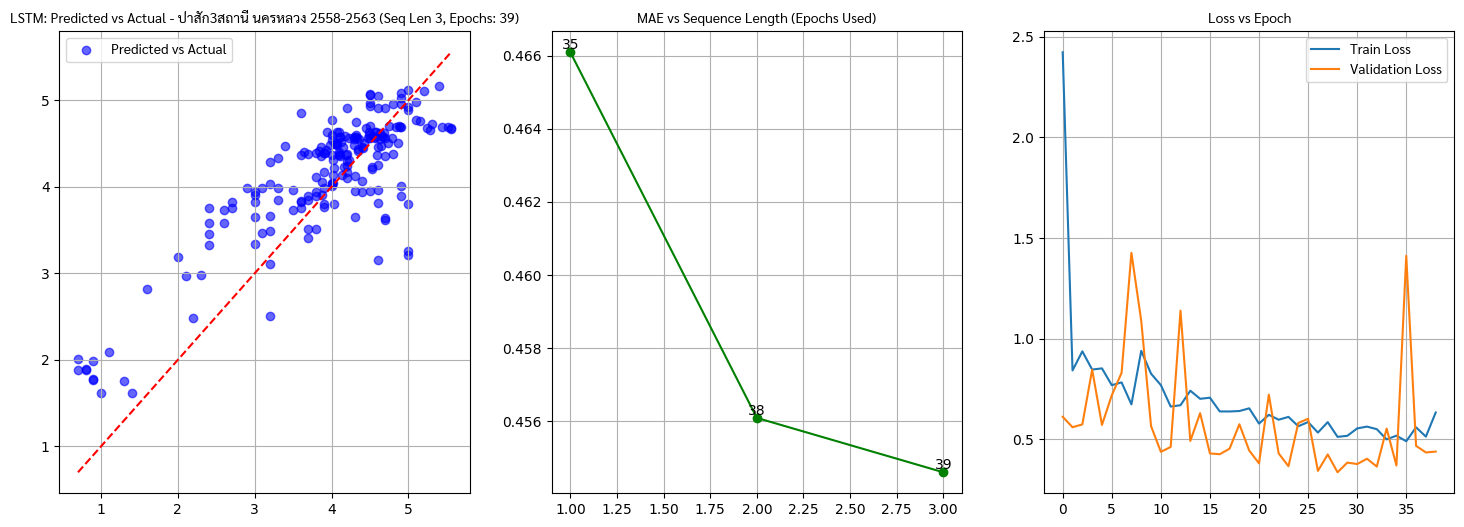

Sequence Length: 1
Epoch 1/100
350/350 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - loss: 1.0198 - mae: 0.7660 - val_loss: 0.3869 - val_mae: 0.5072
Epoch 2/100
350/350 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.4283 - mae: 0.5218 - val_loss: 0.4930 - val_mae: 0.5572
Epoch 3/100
350/350 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.3851 - mae: 0.4990 - val_loss: 0.2691 - val_mae: 0.3904
Epoch 4/100
350/350 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.3488 - mae: 0.4609 - val_loss: 0.2795 - val_mae: 0.4015
Epoch 5/100
350/350 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.3697 - mae: 0.4864 - val_loss: 0.2903 - val_mae: 0.3977
Epoch 6/100
350/350 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.3565 - mae: 0.4757 - val_loss: 0.2846 - val_mae: 0.3992
Epoch 7/100
350/350 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.3860 - mae: 0.4968 - val_loss: 0.5147 - val_mae: 0.5859
Epoch 8/100
350/350 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.3406 - mae: 0.4524 - val_loss: 0.3606 - val_mae: 0.4791
Epoch 9/100
350/350 ━━━━━━━━━

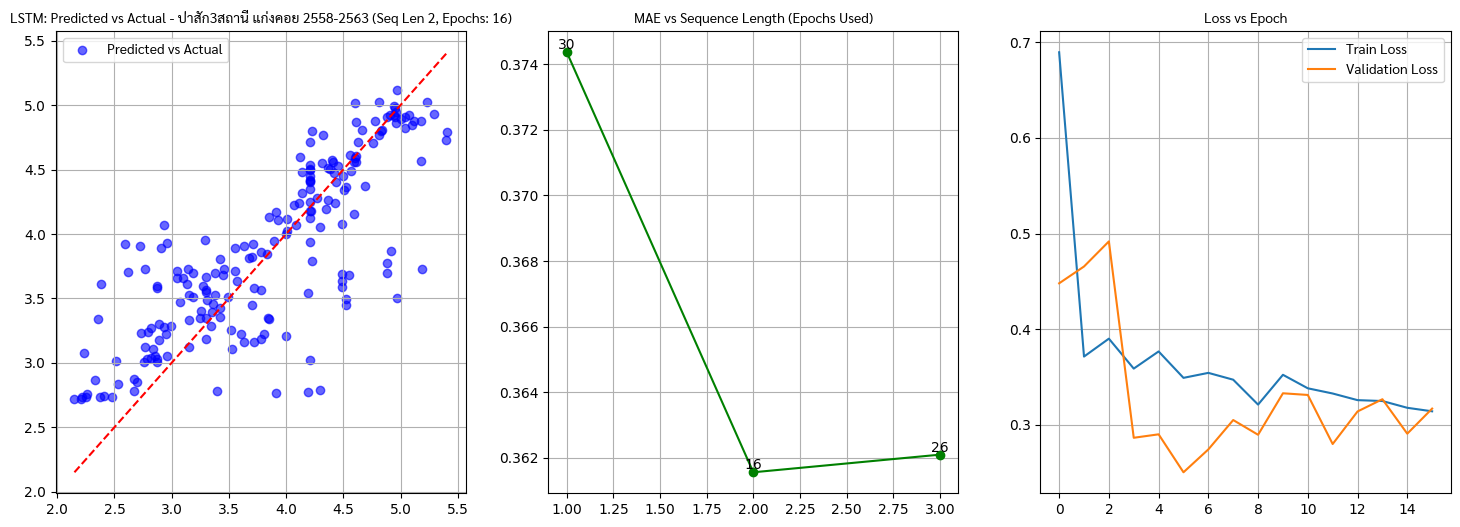

Sequence Length: 1
Epoch 1/100
350/350 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - loss: 1.0363 - mae: 0.6878 - val_loss: 0.3695 - val_mae: 0.3765
Epoch 2/100
350/350 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.6366 - mae: 0.4916 - val_loss: 0.3774 - val_mae: 0.3905
Epoch 3/100
350/350 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.4809 - mae: 0.4311 - val_loss: 0.3635 - val_mae: 0.3638
Epoch 4/100
350/350 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.5223 - mae: 0.4434 - val_loss: 0.4707 - val_mae: 0.4445
Epoch 5/100
350/350 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.4433 - mae: 0.4223 - val_loss: 0.4530 - val_mae: 0.4005
Epoch 6/100
350/350 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.5159 - mae: 0.4372 - val_loss: 0.3723 - val_mae: 0.3764
Epoch 7/100
350/350 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.5797 - mae: 0.4614 - val_loss: 0.3575 - val_mae: 0.3763
Epoch 8/100
350/350 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.5851 - mae: 0.4530 - val_loss: 0.3727 - val_mae: 0.3654
Epoch 9/100
350/350 ━━━━━━━━━

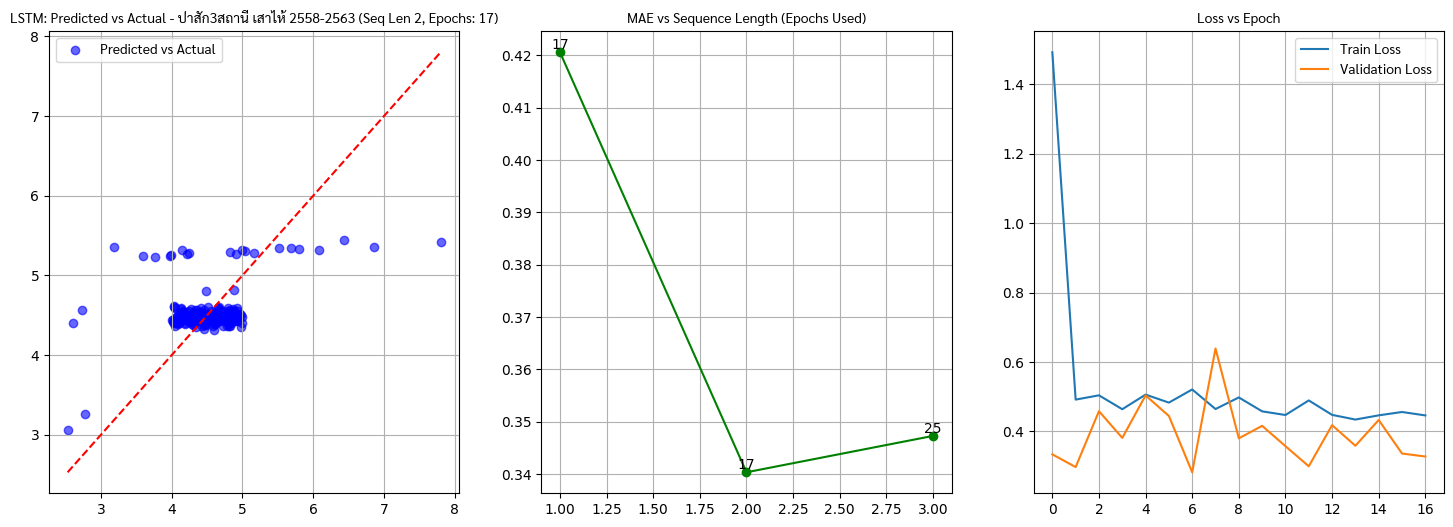

Sequence Length: 1
Epoch 1/100
350/350 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - loss: 7.1852 - mae: 1.9114 - val_loss: 2.8348 - val_mae: 1.1771
Epoch 2/100
350/350 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 3.2453 - mae: 1.2899 - val_loss: 2.4490 - val_mae: 1.2027
Epoch 3/100
350/350 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 2.3044 - mae: 1.0766 - val_loss: 2.5112 - val_mae: 1.2357
Epoch 4/100
350/350 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 2.8935 - mae: 1.2206 - val_loss: 1.9572 - val_mae: 0.9932
Epoch 5/100
350/350 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 2.4757 - mae: 1.0560 - val_loss: 1.9845 - val_mae: 1.0040
Epoch 6/100
350/350 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 2.7398 - mae: 1.1528 - val_loss: 1.8768 - val_mae: 0.9709
Epoch 7/100
350/350 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 2.2985 - mae: 1.0574 - val_loss: 2.0250 - val_mae: 0.9345
Epoch 8/100
350/350 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 2.2544 - mae: 1.0114 - val_loss: 2.3206 - val_mae: 1.1856
Epoch 9/100
350/350 ━━━━━━━━━

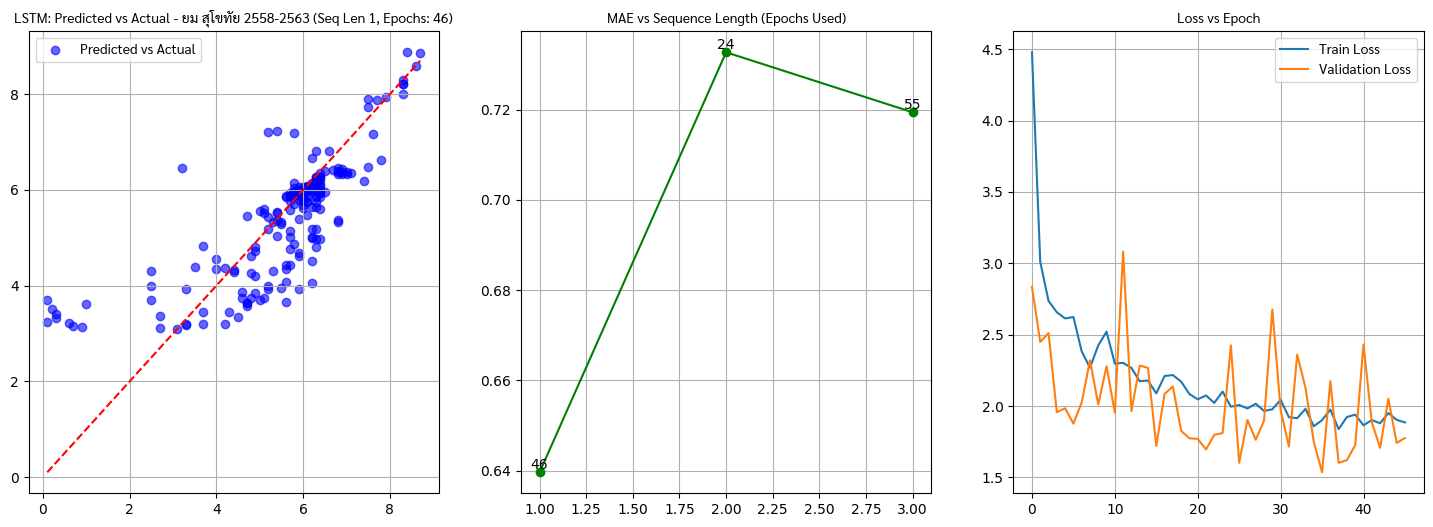

Sequence Length: 1
Epoch 1/100
350/350 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - loss: 4.8133 - mae: 1.8500 - val_loss: 3.4432 - val_mae: 1.5473
Epoch 2/100
350/350 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 3.3687 - mae: 1.4698 - val_loss: 3.4634 - val_mae: 1.6244
Epoch 3/100
350/350 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 3.2669 - mae: 1.3913 - val_loss: 2.9074 - val_mae: 1.3054
Epoch 4/100
350/350 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 2.8145 - mae: 1.2724 - val_loss: 3.5642 - val_mae: 1.6979
Epoch 5/100
350/350 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 3.0167 - mae: 1.3352 - val_loss: 2.5820 - val_mae: 1.2821
Epoch 6/100
350/350 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 2.8043 - mae: 1.2625 - val_loss: 2.6507 - val_mae: 1.1235
Epoch 7/100
350/350 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 2.6685 - mae: 1.2424 - val_loss: 4.0916 - val_mae: 1.3481
Epoch 8/100
350/350 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 2.7473 - mae: 1.2705 - val_loss: 1.8622 - val_mae: 1.0252
Epoch 9/100
350/350 ━━━━━━━━━

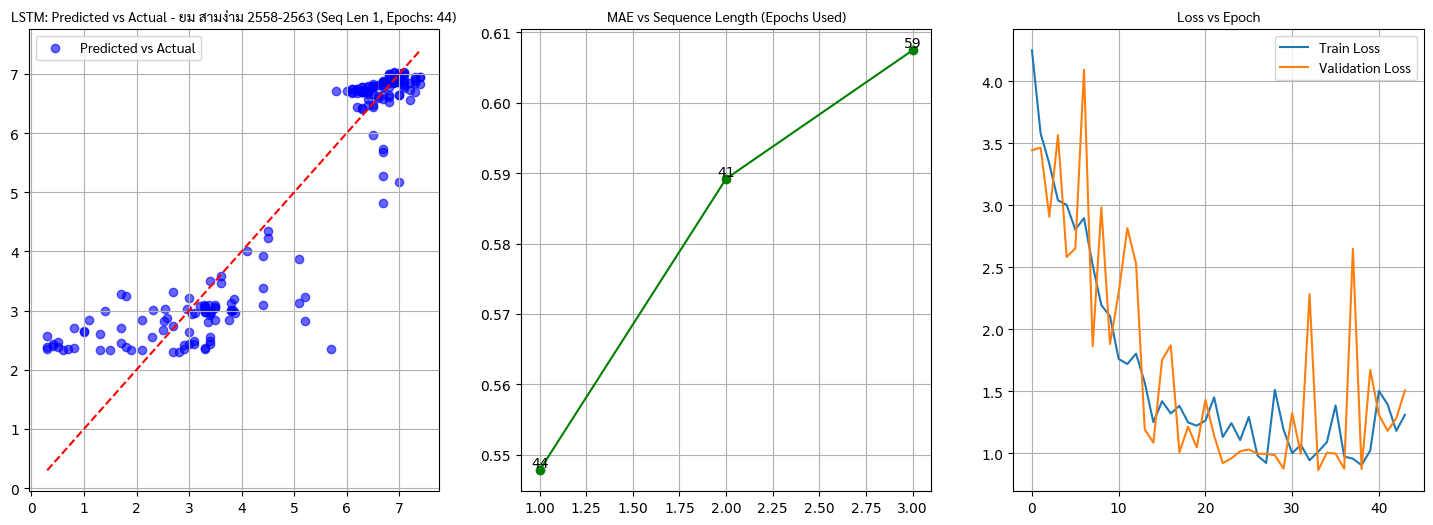

Sequence Length: 1
Epoch 1/100
350/350 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - loss: 2.7508 - mae: 1.1190 - val_loss: 0.5680 - val_mae: 0.6385
Epoch 2/100
350/350 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.6113 - mae: 0.6262 - val_loss: 0.5709 - val_mae: 0.6435
Epoch 3/100
350/350 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.6322 - mae: 0.6274 - val_loss: 0.8970 - val_mae: 0.8434
Epoch 4/100
350/350 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.7205 - mae: 0.6780 - val_loss: 0.5891 - val_mae: 0.5891
Epoch 5/100
350/350 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.7325 - mae: 0.6848 - val_loss: 0.6857 - val_mae: 0.6171
Epoch 6/100
350/350 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.7464 - mae: 0.6937 - val_loss: 0.4286 - val_mae: 0.5245
Epoch 7/100
350/350 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.6844 - mae: 0.6574 - val_loss: 0.4093 - val_mae: 0.5095
Epoch 8/100
350/350 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.5842 - mae: 0.6014 - val_loss: 0.8606 - val_mae: 0.7704
Epoch 9/100
350/350 ━━━━━━━━━

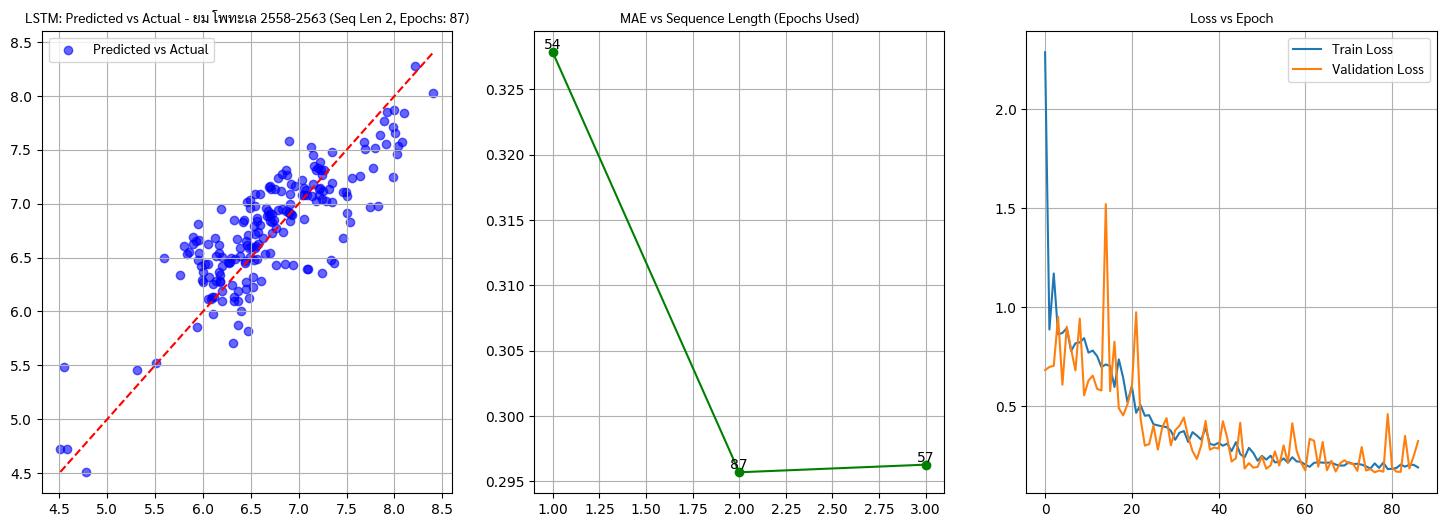

Sequence Length: 1
Epoch 1/100
350/350 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - loss: 12.0016 - mae: 2.1759 - val_loss: 2.6887 - val_mae: 1.3292
Epoch 2/100
350/350 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 2.5355 - mae: 1.3262 - val_loss: 3.3551 - val_mae: 1.4679
Epoch 3/100
350/350 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 2.5126 - mae: 1.3150 - val_loss: 2.3885 - val_mae: 1.3099
Epoch 4/100
350/350 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 2.5051 - mae: 1.3048 - val_loss: 2.2718 - val_mae: 1.2603
Epoch 5/100
350/350 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 2.3623 - mae: 1.2741 - val_loss: 2.0841 - val_mae: 1.2244
Epoch 6/100
350/350 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 2.4978 - mae: 1.3126 - val_loss: 2.2969 - val_mae: 1.2630
Epoch 7/100
350/350 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 2.3628 - mae: 1.2918 - val_loss: 2.8885 - val_mae: 1.4350
Epoch 8/100
350/350 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 2.7307 - mae: 1.3723 - val_loss: 2.3248 - val_mae: 1.2681
Epoch 9/100
350/350 ━━━━━━━━

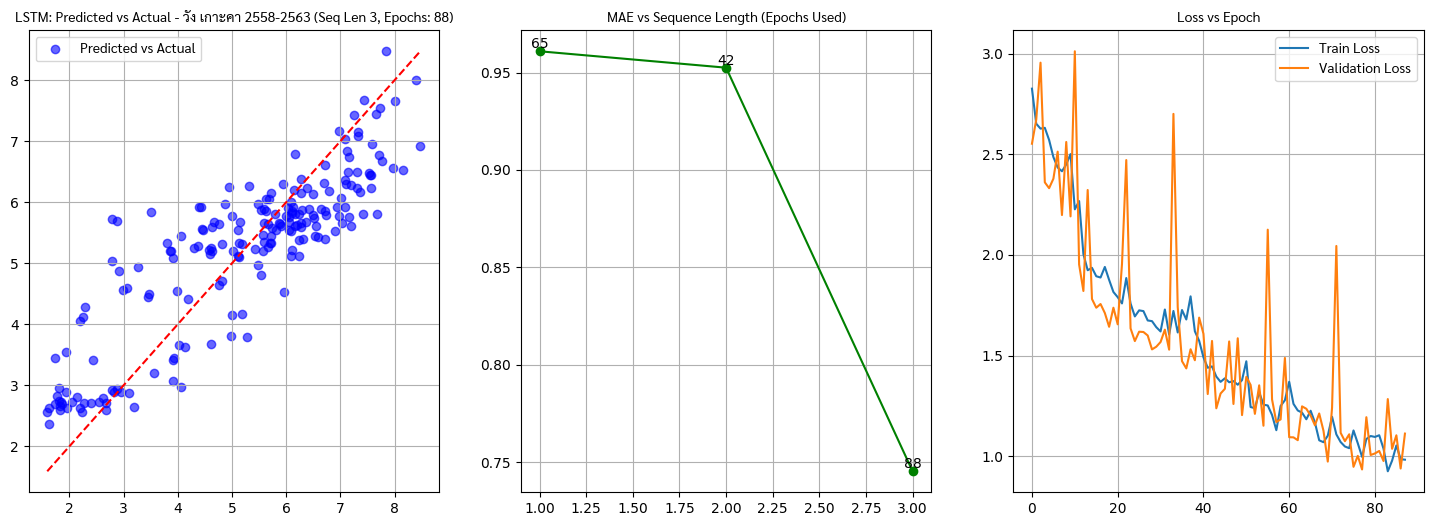

Sequence Length: 1
Epoch 1/100
350/350 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - loss: 0.1017 - mae: 0.2185 - val_loss: 0.0472 - val_mae: 0.1534
Epoch 2/100
350/350 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0439 - mae: 0.1607 - val_loss: 0.0626 - val_mae: 0.1933
Epoch 3/100
350/350 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0421 - mae: 0.1563 - val_loss: 0.0484 - val_mae: 0.1942
Epoch 4/100
350/350 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0360 - mae: 0.1439 - val_loss: 0.0293 - val_mae: 0.1391
Epoch 5/100
350/350 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0451 - mae: 0.1596 - val_loss: 0.0273 - val_mae: 0.1146
Epoch 6/100
350/350 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0356 - mae: 0.1446 - val_loss: 0.0620 - val_mae: 0.2247
Epoch 7/100
350/350 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0356 - mae: 0.1448 - val_loss: 0.0302 - val_mae: 0.1178
Epoch 8/100
350/350 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0379 - mae: 0.1452 - val_loss: 0.0287 - val_mae: 0.1160
Epoch 9/100
350/350 ━━━━━━━━━

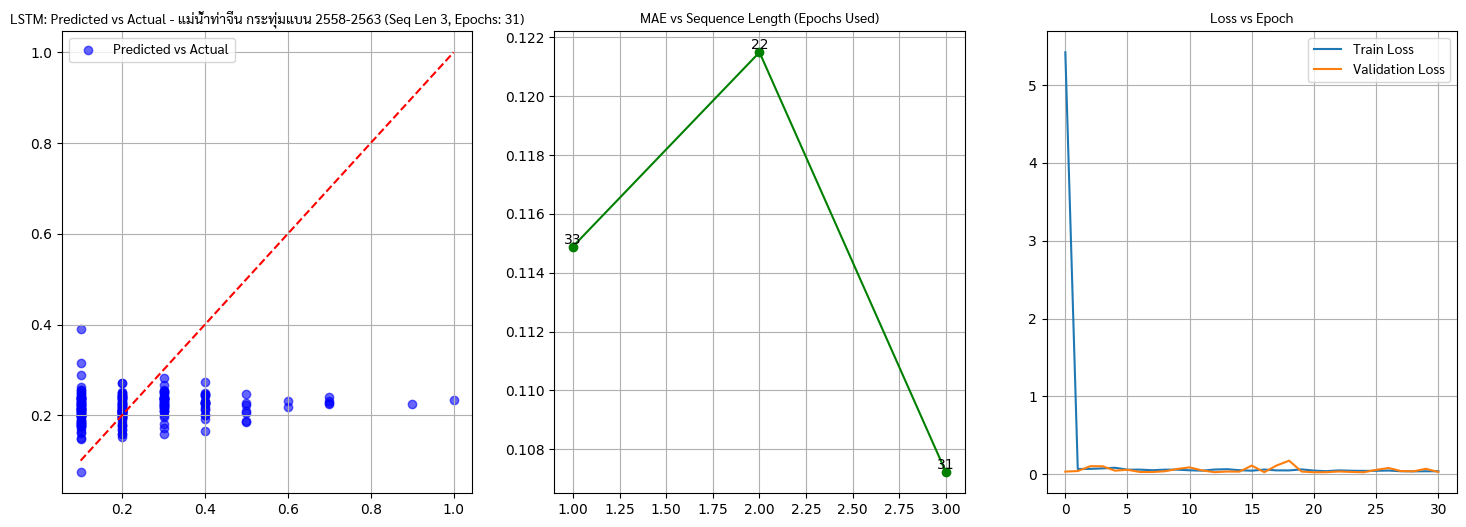

Sequence Length: 1
Epoch 1/100
350/350 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - loss: 13.8686 - mae: 2.2612 - val_loss: 0.1413 - val_mae: 0.3123
Epoch 2/100
350/350 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.1508 - mae: 0.3043 - val_loss: 0.0825 - val_mae: 0.2356
Epoch 3/100
350/350 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.1184 - mae: 0.2637 - val_loss: 0.2173 - val_mae: 0.4005
Epoch 4/100
350/350 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.1705 - mae: 0.3024 - val_loss: 0.0735 - val_mae: 0.2182
Epoch 5/100
350/350 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.1438 - mae: 0.2793 - val_loss: 0.0823 - val_mae: 0.2325
Epoch 6/100
350/350 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.1206 - mae: 0.2760 - val_loss: 0.0762 - val_mae: 0.2277
Epoch 7/100
350/350 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.1673 - mae: 0.3139 - val_loss: 0.1234 - val_mae: 0.2764
Epoch 8/100
350/350 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.1344 - mae: 0.2837 - val_loss: 0.0664 - val_mae: 0.2084
Epoch 9/100
350/350 ━━━━━━━━

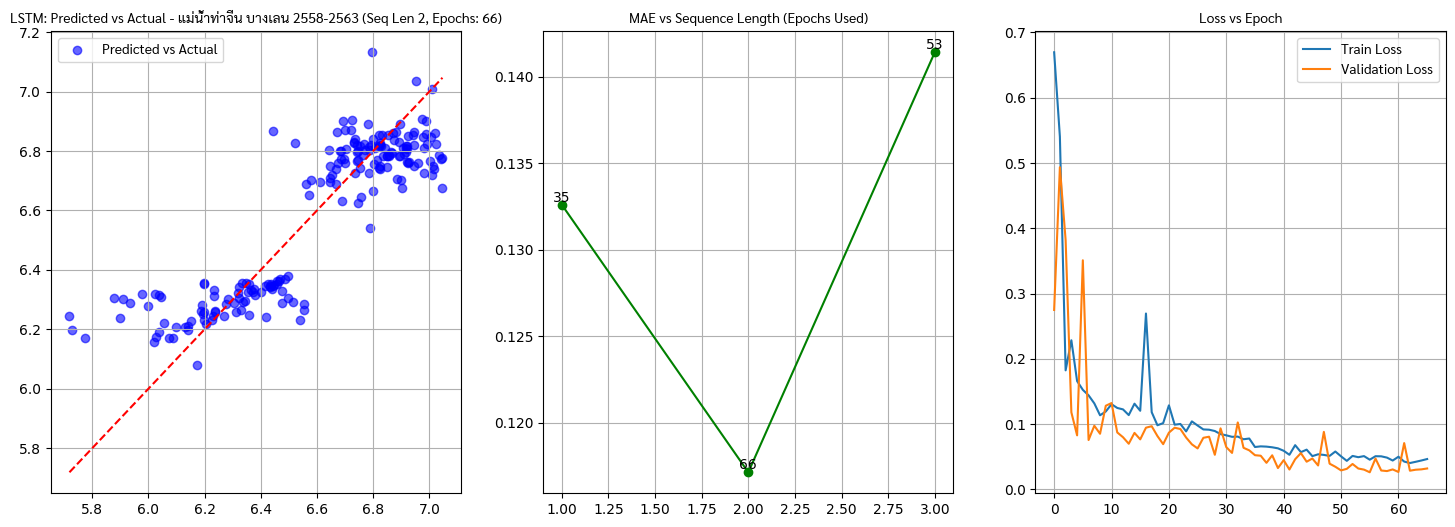

Sequence Length: 1
Epoch 1/100
350/350 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - loss: 1.7768 - mae: 0.7459 - val_loss: 0.1088 - val_mae: 0.2760
Epoch 2/100
350/350 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.1210 - mae: 0.2880 - val_loss: 0.1054 - val_mae: 0.2761
Epoch 3/100
350/350 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.1145 - mae: 0.2832 - val_loss: 0.1152 - val_mae: 0.2763
Epoch 4/100
350/350 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.1091 - mae: 0.2744 - val_loss: 0.1326 - val_mae: 0.3050
Epoch 5/100
350/350 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.1304 - mae: 0.2971 - val_loss: 0.1035 - val_mae: 0.2700
Epoch 6/100
350/350 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.1150 - mae: 0.2781 - val_loss: 0.1132 - val_mae: 0.2875
Epoch 7/100
350/350 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.1272 - mae: 0.2962 - val_loss: 0.1086 - val_mae: 0.2809
Epoch 8/100
350/350 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.1310 - mae: 0.3047 - val_loss: 0.1027 - val_mae: 0.2705
Epoch 9/100
350/350 ━━━━━━━━━

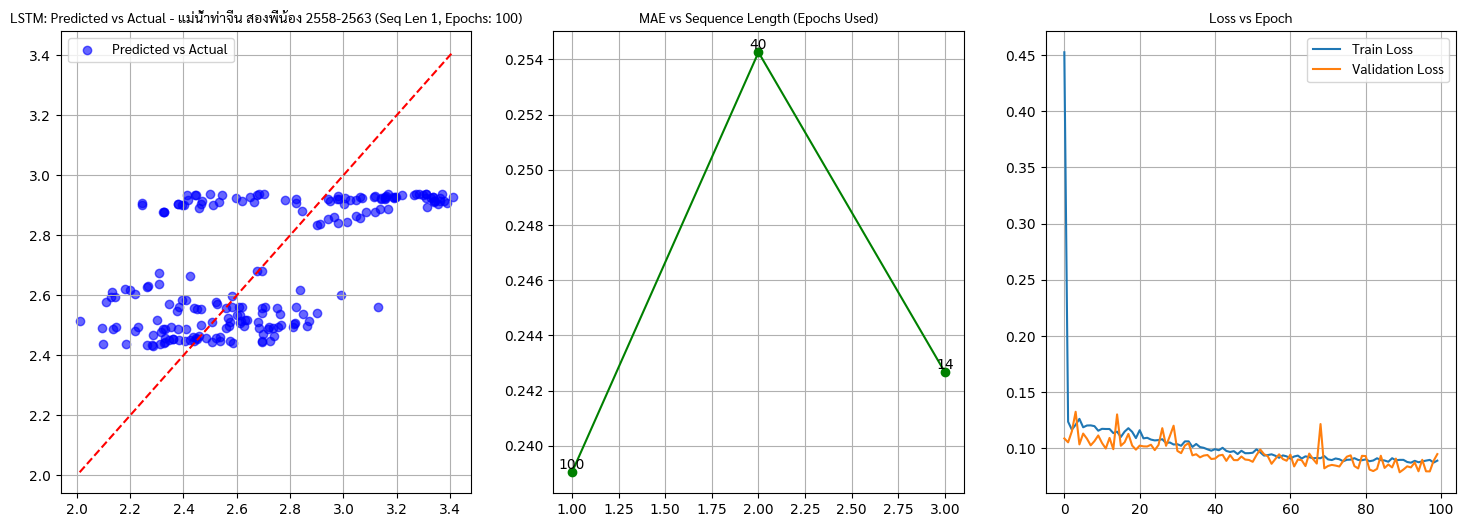

Sequence Length: 1
Epoch 1/100
350/350 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - loss: 1.3883 - mae: 0.8205 - val_loss: 0.6023 - val_mae: 0.6248
Epoch 2/100
350/350 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.6451 - mae: 0.6489 - val_loss: 0.5983 - val_mae: 0.5997
Epoch 3/100
350/350 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.6318 - mae: 0.6276 - val_loss: 0.5912 - val_mae: 0.6012
Epoch 4/100
350/350 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.6280 - mae: 0.6319 - val_loss: 0.5980 - val_mae: 0.5991
Epoch 5/100
350/350 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.6414 - mae: 0.6379 - val_loss: 0.5917 - val_mae: 0.6179
Epoch 6/100
350/350 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.5801 - mae: 0.6075 - val_loss: 0.6066 - val_mae: 0.5998
Epoch 7/100
350/350 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.6142 - mae: 0.6255 - val_loss: 0.5939 - val_mae: 0.5992
Epoch 8/100
350/350 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.5997 - mae: 0.6174 - val_loss: 0.5997 - val_mae: 0.5990
Epoch 9/100
350/350 ━━━━━━━━━

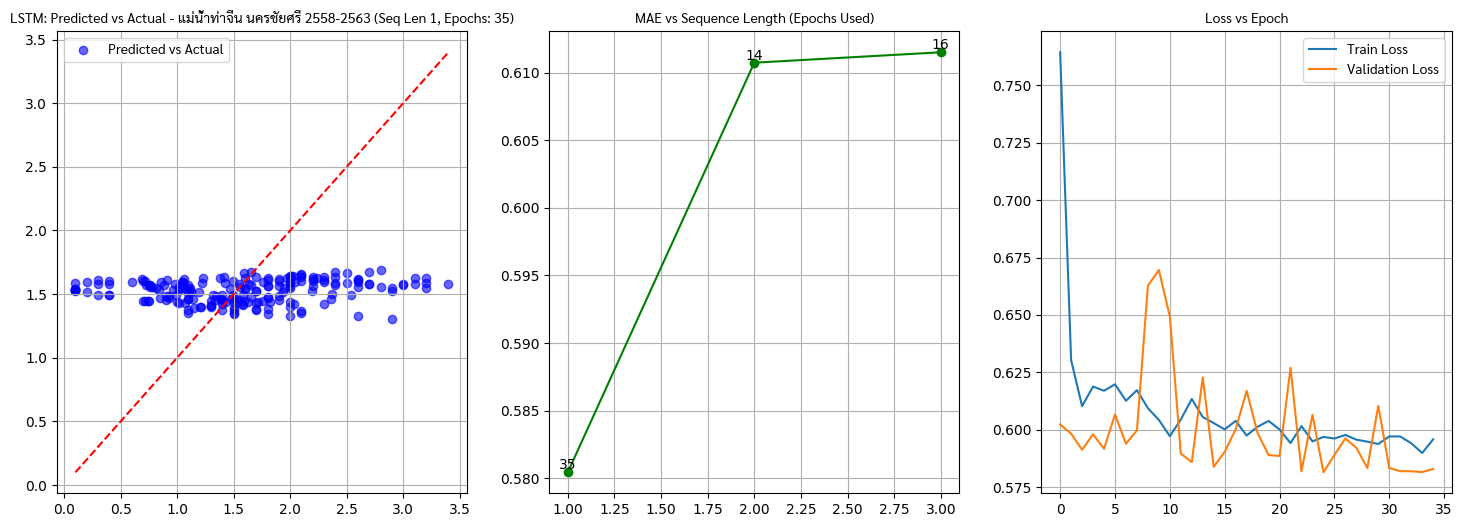

Sequence Length: 1
Epoch 1/100
350/350 ━━━━━━━━━━━━━━━━━━━━ 6s 8ms/step - loss: 14.8377 - mae: 2.0960 - val_loss: 0.1390 - val_mae: 0.2870
Epoch 2/100
350/350 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.1211 - mae: 0.2780 - val_loss: 0.1066 - val_mae: 0.2655
Epoch 3/100
350/350 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.1104 - mae: 0.2627 - val_loss: 0.1490 - val_mae: 0.3186
Epoch 4/100
350/350 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.1529 - mae: 0.3107 - val_loss: 0.1839 - val_mae: 0.3704
Epoch 5/100
350/350 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.1456 - mae: 0.3070 - val_loss: 0.1231 - val_mae: 0.2839
Epoch 6/100
350/350 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.1363 - mae: 0.2968 - val_loss: 0.1168 - val_mae: 0.2716
Epoch 7/100
350/350 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.1260 - mae: 0.2806 - val_loss: 0.2362 - val_mae: 0.4190
Epoch 8/100
350/350 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.1369 - mae: 0.3005 - val_loss: 0.1085 - val_mae: 0.2576
Epoch 9/100
350/350 ━━━━━━━━

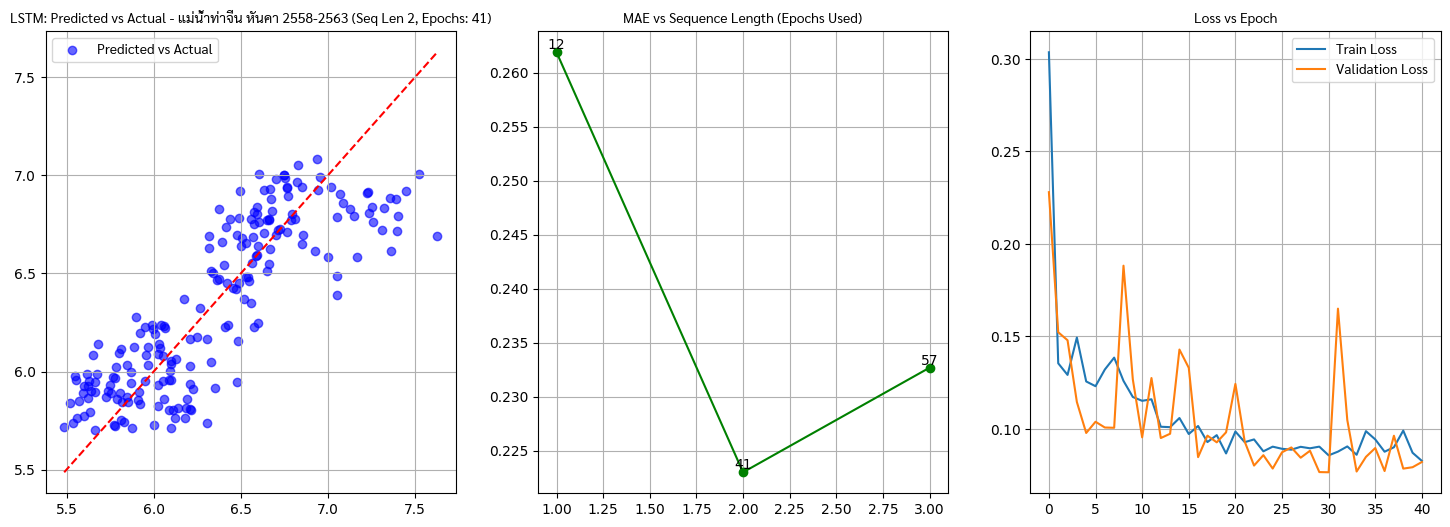

Sequence Length: 1
Epoch 1/100
350/350 ━━━━━━━━━━━━━━━━━━━━ 6s 8ms/step - loss: 0.4667 - mae: 0.5179 - val_loss: 0.2992 - val_mae: 0.3816
Epoch 2/100
350/350 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.3093 - mae: 0.4435 - val_loss: 0.2665 - val_mae: 0.4242
Epoch 3/100
350/350 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.2902 - mae: 0.4394 - val_loss: 0.2659 - val_mae: 0.4087
Epoch 4/100
350/350 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.2928 - mae: 0.4391 - val_loss: 0.2663 - val_mae: 0.4209
Epoch 5/100
350/350 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.3009 - mae: 0.4336 - val_loss: 0.2694 - val_mae: 0.4343
Epoch 6/100
350/350 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.2933 - mae: 0.4398 - val_loss: 0.2672 - val_mae: 0.4255
Epoch 7/100
350/350 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.2824 - mae: 0.4271 - val_loss: 0.3291 - val_mae: 0.5191
Epoch 8/100
350/350 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.2912 - mae: 0.4435 - val_loss: 0.3209 - val_mae: 0.5108
Epoch 9/100
350/350 ━━━━━━━━━

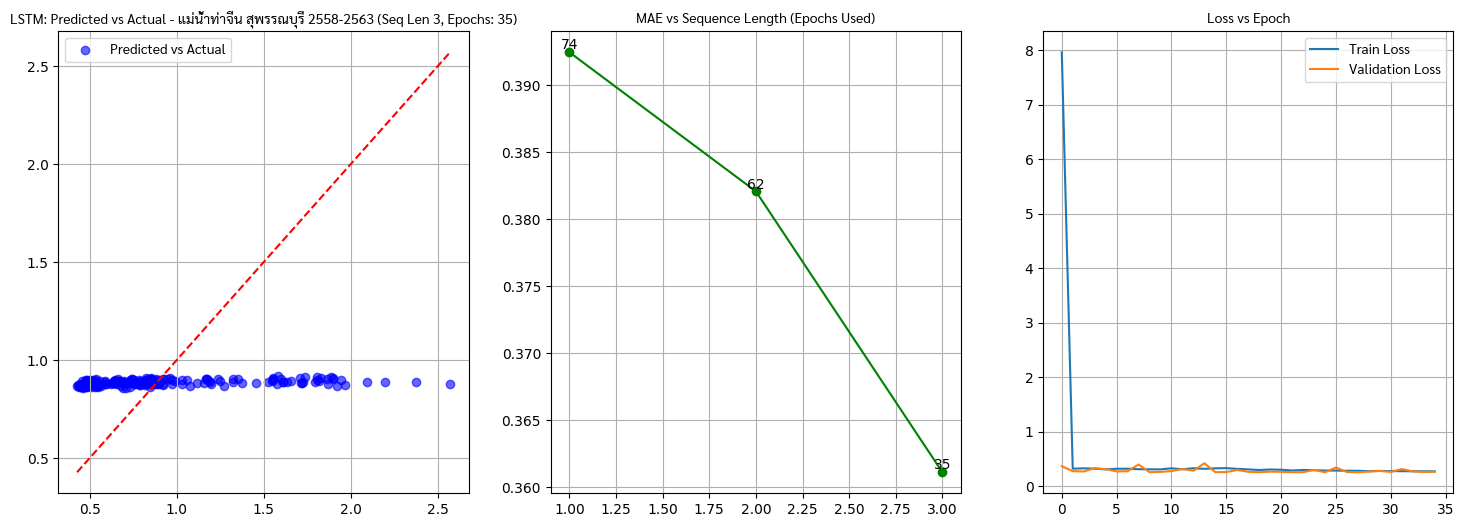

Sequence Length: 1
Epoch 1/100
350/350 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - loss: 5.8076 - mae: 1.5984 - val_loss: 0.6389 - val_mae: 0.6412
Epoch 2/100
350/350 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.8340 - mae: 0.7335 - val_loss: 0.5520 - val_mae: 0.5935
Epoch 3/100
350/350 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.6909 - mae: 0.6620 - val_loss: 0.7289 - val_mae: 0.6878
Epoch 4/100
350/350 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.7266 - mae: 0.6755 - val_loss: 0.7896 - val_mae: 0.7290
Epoch 5/100
350/350 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.6401 - mae: 0.6419 - val_loss: 0.5960 - val_mae: 0.6165
Epoch 6/100
350/350 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.7390 - mae: 0.6784 - val_loss: 0.5695 - val_mae: 0.5983
Epoch 7/100
350/350 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.6813 - mae: 0.6648 - val_loss: 0.6570 - val_mae: 0.6756
Epoch 8/100
350/350 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.8002 - mae: 0.6998 - val_loss: 0.6922 - val_mae: 0.7049
Epoch 9/100
350/350 ━━━━━━━━━

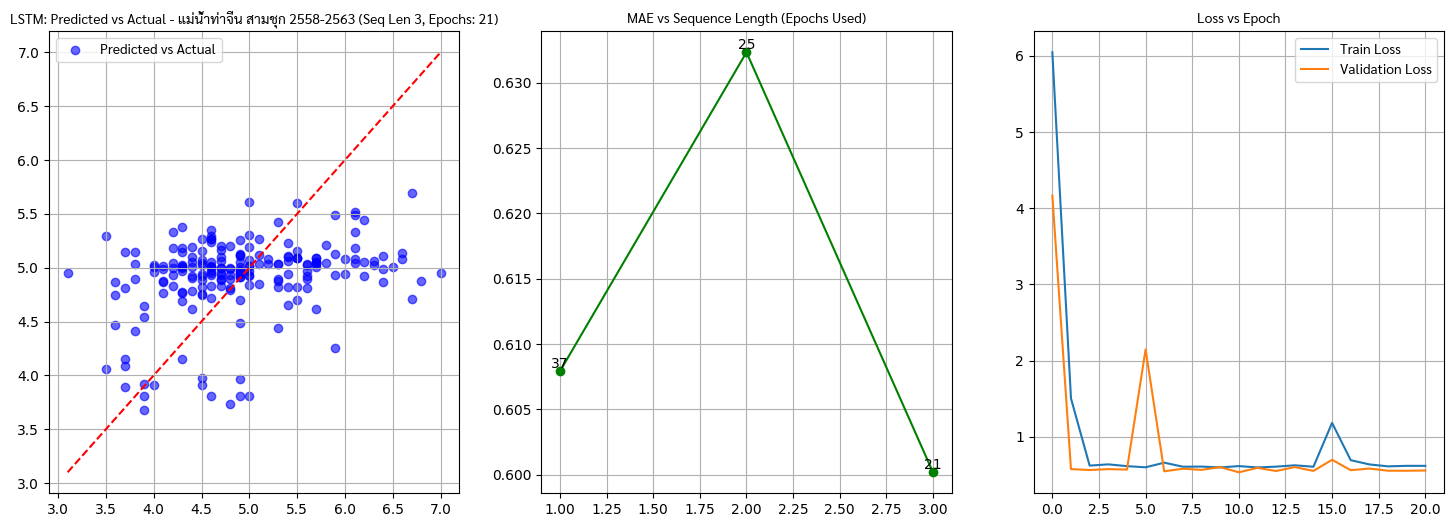

Sequence Length: 1
Epoch 1/100
350/350 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - loss: 12.9607 - mae: 2.4867 - val_loss: 1.8266 - val_mae: 1.0662
Epoch 2/100
350/350 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.9380 - mae: 1.0922 - val_loss: 1.8387 - val_mae: 1.0713
Epoch 3/100
350/350 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.9128 - mae: 1.1019 - val_loss: 1.8355 - val_mae: 1.1183
Epoch 4/100
350/350 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 2.0077 - mae: 1.1152 - val_loss: 2.2655 - val_mae: 1.3138
Epoch 5/100
350/350 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.9339 - mae: 1.1170 - val_loss: 1.8640 - val_mae: 1.0608
Epoch 6/100
350/350 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.8427 - mae: 1.0632 - val_loss: 1.7911 - val_mae: 1.0754
Epoch 7/100
350/350 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.9083 - mae: 1.0862 - val_loss: 1.8937 - val_mae: 1.1566
Epoch 8/100
350/350 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.8313 - mae: 1.0429 - val_loss: 1.8232 - val_mae: 1.0361
Epoch 9/100
350/350 ━━━━━━━━

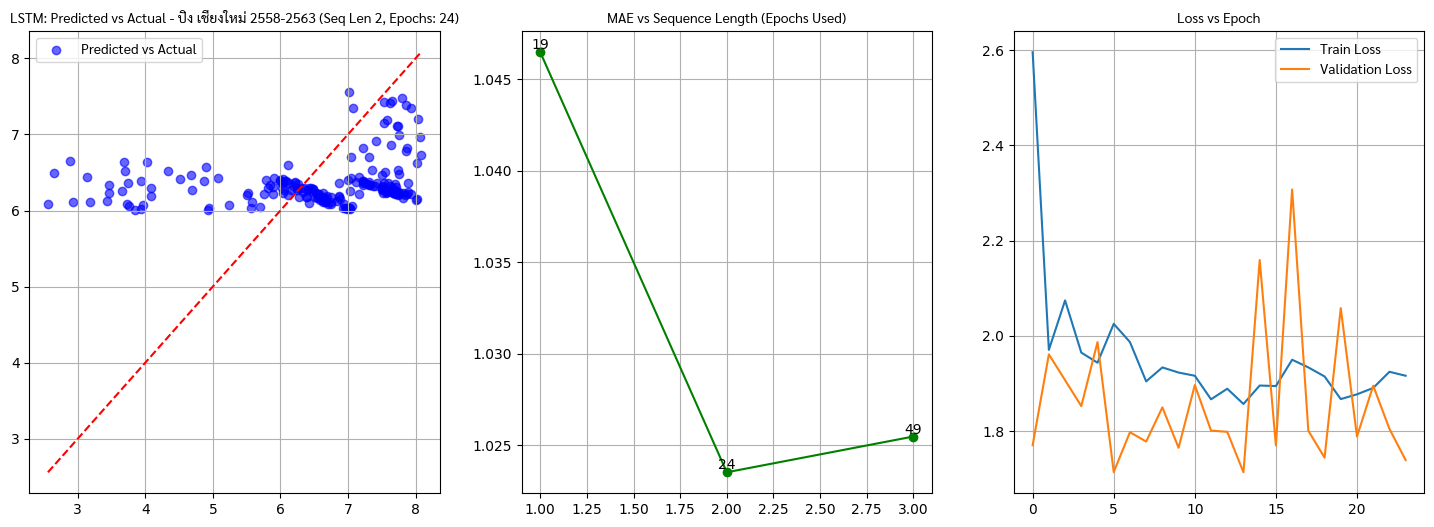

Sequence Length: 1
Epoch 1/100
350/350 ━━━━━━━━━━━━━━━━━━━━ 6s 8ms/step - loss: 3.2865 - mae: 1.0669 - val_loss: 0.1469 - val_mae: 0.3070
Epoch 2/100
350/350 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.1577 - mae: 0.3154 - val_loss: 0.1163 - val_mae: 0.2652
Epoch 3/100
350/350 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.1568 - mae: 0.3140 - val_loss: 0.1296 - val_mae: 0.2808
Epoch 4/100
350/350 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.1518 - mae: 0.3098 - val_loss: 0.1143 - val_mae: 0.2654
Epoch 5/100
350/350 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.1530 - mae: 0.3059 - val_loss: 0.1189 - val_mae: 0.2726
Epoch 6/100
350/350 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.1666 - mae: 0.3249 - val_loss: 0.1154 - val_mae: 0.2663
Epoch 7/100
350/350 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.1521 - mae: 0.3128 - val_loss: 0.1442 - val_mae: 0.3039
Epoch 8/100
350/350 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.1438 - mae: 0.2998 - val_loss: 0.1146 - val_mae: 0.2652
Epoch 9/100
350/350 ━━━━━━━━━

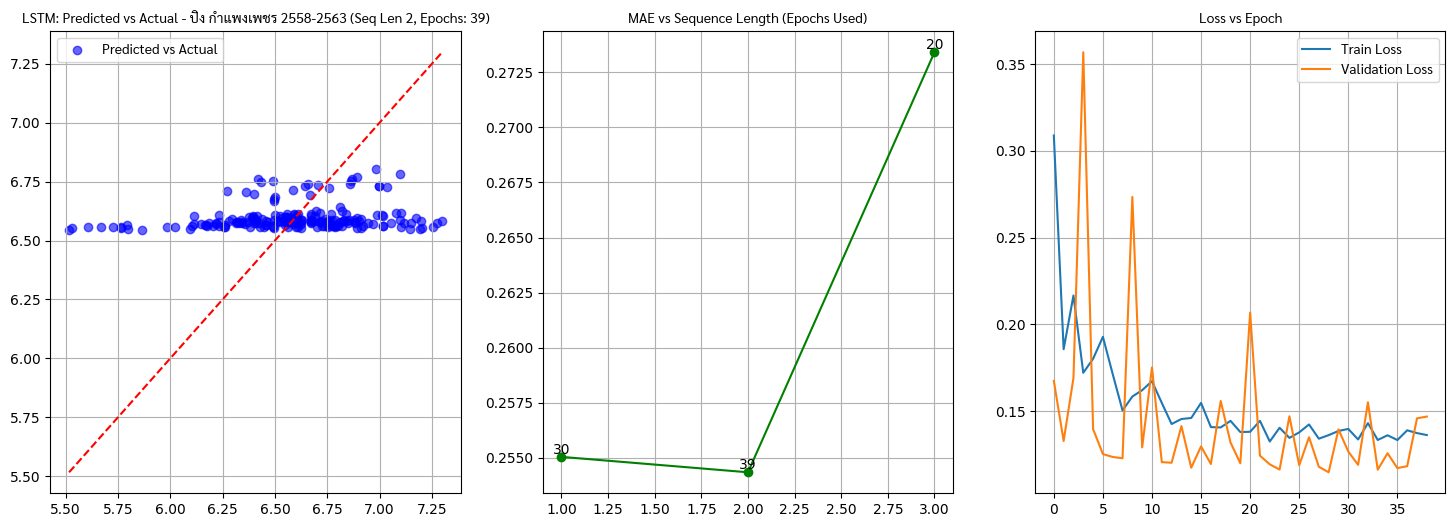

Sequence Length: 1
Epoch 1/100
350/350 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - loss: 14.5637 - mae: 2.1166 - val_loss: 0.1370 - val_mae: 0.2760
Epoch 2/100
350/350 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.1309 - mae: 0.2767 - val_loss: 0.1457 - val_mae: 0.2990
Epoch 3/100
350/350 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.1370 - mae: 0.2834 - val_loss: 0.1301 - val_mae: 0.2783
Epoch 4/100
350/350 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.1518 - mae: 0.3065 - val_loss: 0.1202 - val_mae: 0.2574
Epoch 5/100
350/350 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.1332 - mae: 0.2784 - val_loss: 0.1325 - val_mae: 0.2862
Epoch 6/100
350/350 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.1334 - mae: 0.2816 - val_loss: 0.1480 - val_mae: 0.3071
Epoch 7/100
350/350 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.1219 - mae: 0.2647 - val_loss: 0.1139 - val_mae: 0.2516
Epoch 8/100
350/350 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.1474 - mae: 0.2915 - val_loss: 0.1347 - val_mae: 0.2753
Epoch 9/100
350/350 ━━━━━━━━

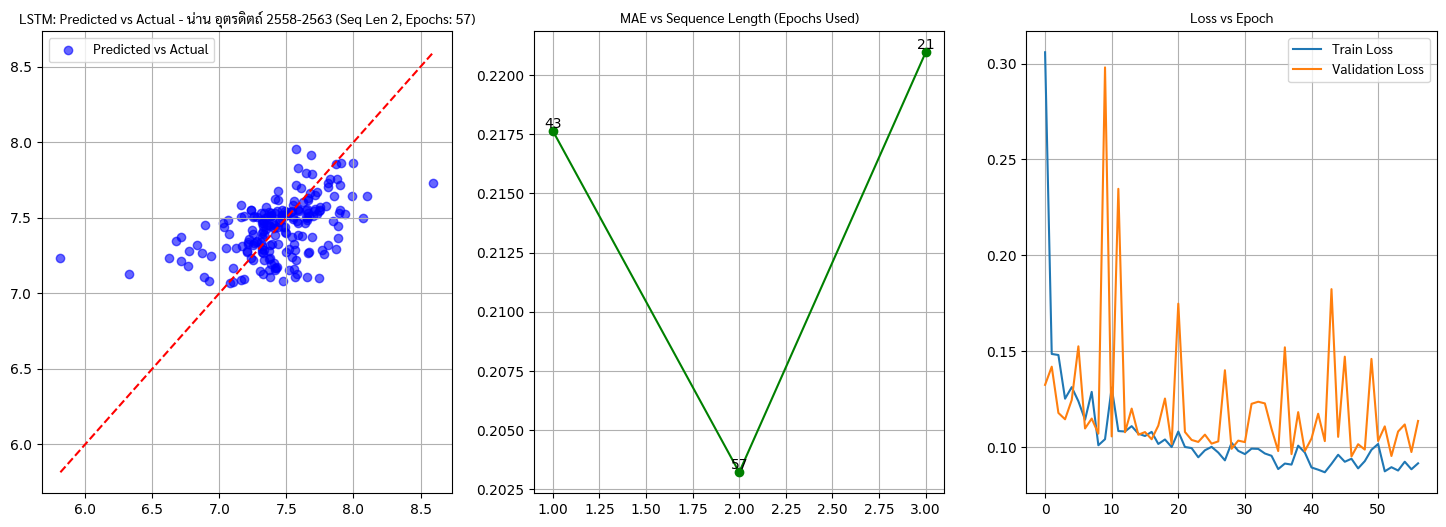

Sequence Length: 1
Epoch 1/100
350/350 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - loss: 5.1915 - mae: 1.4812 - val_loss: 0.5952 - val_mae: 0.6481
Epoch 2/100
350/350 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.3982 - mae: 0.5154 - val_loss: 0.3559 - val_mae: 0.4944
Epoch 3/100
350/350 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.4201 - mae: 0.5224 - val_loss: 0.2734 - val_mae: 0.4228
Epoch 4/100
350/350 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.3211 - mae: 0.4582 - val_loss: 0.2832 - val_mae: 0.4274
Epoch 5/100
350/350 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.3098 - mae: 0.4560 - val_loss: 0.2679 - val_mae: 0.4109
Epoch 6/100
350/350 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.3339 - mae: 0.4737 - val_loss: 0.2889 - val_mae: 0.4250
Epoch 7/100
350/350 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.2917 - mae: 0.4398 - val_loss: 0.3115 - val_mae: 0.4478
Epoch 8/100
350/350 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.3296 - mae: 0.4601 - val_loss: 0.2657 - val_mae: 0.4135
Epoch 9/100
350/350 ━━━━━━━━━

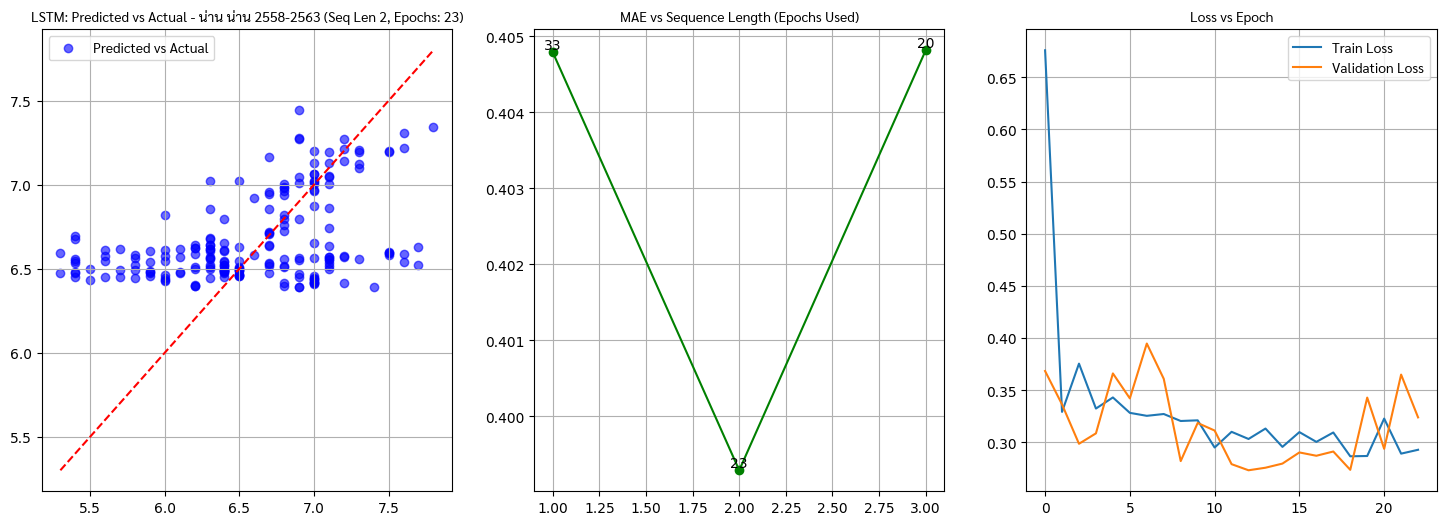

Sequence Length: 1
Epoch 1/100
350/350 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - loss: 1.7067 - mae: 0.8805 - val_loss: 0.4477 - val_mae: 0.5543
Epoch 2/100
350/350 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.2516 - mae: 0.3954 - val_loss: 0.2988 - val_mae: 0.4504
Epoch 3/100
350/350 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.2315 - mae: 0.3772 - val_loss: 0.1721 - val_mae: 0.3284
Epoch 4/100
350/350 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.2491 - mae: 0.3965 - val_loss: 0.1658 - val_mae: 0.3261
Epoch 5/100
350/350 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.2266 - mae: 0.3819 - val_loss: 0.2671 - val_mae: 0.4257
Epoch 6/100
350/350 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.2440 - mae: 0.3924 - val_loss: 0.1562 - val_mae: 0.3094
Epoch 7/100
350/350 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.2028 - mae: 0.3600 - val_loss: 0.3957 - val_mae: 0.5263
Epoch 8/100
350/350 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.2341 - mae: 0.3855 - val_loss: 0.2077 - val_mae: 0.3466
Epoch 9/100
350/350 ━━━━━━━━━

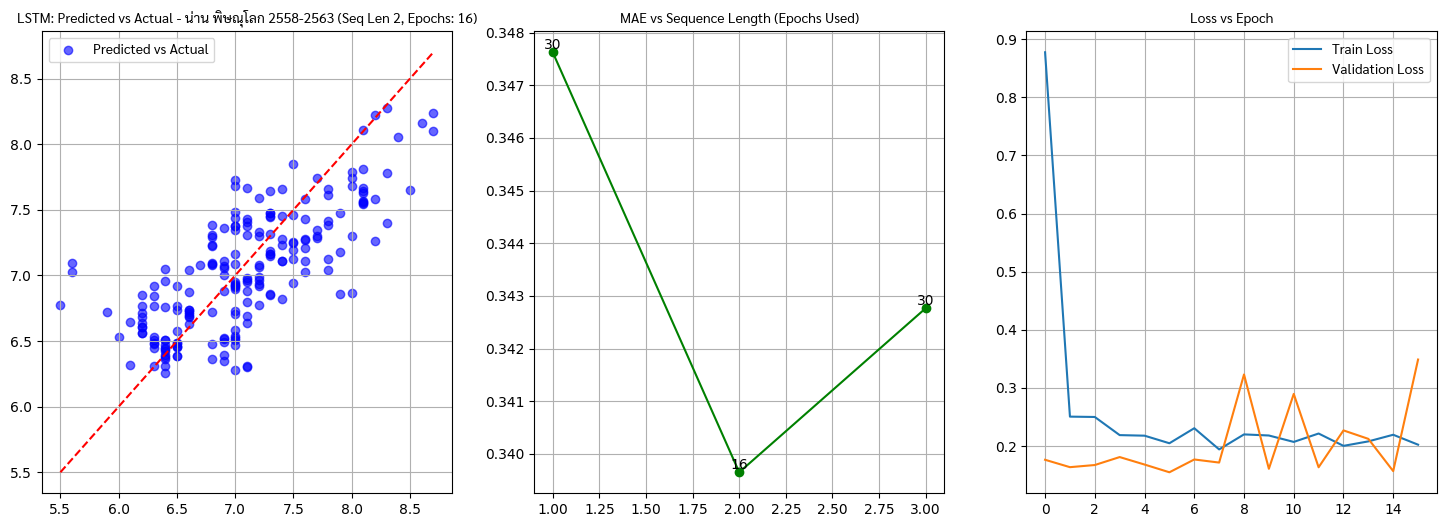

In [6]:
for station, dataset in datasets.items():
    seq_results = []

    for seq_len in range(1, 4):
        print(f"Sequence Length: {seq_len}")
        X, y = create_sequences(dataset.X, dataset.y, seq_len)
        X_train, X_temp, y_train, y_temp = train_test_split(X, y, train_size=TRAIN_RATIO, random_state=RANDOM_STATE)
        X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=TEST_RATIO / (TEST_RATIO + VAL_RATIO), random_state=RANDOM_STATE)

        model = models.Sequential([
            layers.Input(shape=(seq_len, 3)),
            layers.LSTM(64, activation="relu", return_sequences=True),
            layers.LSTM(32, activation="relu"),
            layers.Dense(1)
        ])

        model.compile(optimizer=optimizers.Adam(learning_rate=0.001), loss="mse", metrics=["mae"])
        history = model.fit(
            X_train, y_train, 
            epochs=100,
            batch_size=4,
            validation_data=(X_val, y_val),
            callbacks=[callbacks.EarlyStopping(monitor="val_loss", patience=10, restore_best_weights=True)]
        )

        y_pred = model.predict(X_test)
        mae = mean_absolute_error(y_test, y_pred)

        seq_results.append((seq_len, mae, model, y_test, y_pred, history))

    best_len, best_mae, best_model, best_y_test, best_y_pred, best_history = min(seq_results, key=lambda x: x[1])
    best_epochs = len(best_history.history["loss"])

    mae = mean_absolute_error(best_y_test, best_y_pred)
    mse = mean_squared_error(best_y_test, best_y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(best_y_test, best_y_pred)

    best_model.save(OUTPUT_PATH / f"{station}_model.keras")
    results.append({"station": station, "seq_len": best_len, "epochs": best_epochs, "mae": best_mae})

    print(f"Station: {station}")
    print(f"Best Sequence Length: {best_len} (Epochs: {best_epochs})")
    print(f"Mean Absolute Error (MAE): {mae:.4f}")
    print(f"Mean Squared Error (MSE): {mse:.4f}")
    print(f"Root Mean Square Error (RMSE): {rmse:.4f}")
    print(f"R^2 Score: {r2:.4f}")

    fig, ax = plt.subplots(1, 3, figsize=(18, 6))

    ax[0].scatter(best_y_test, best_y_pred, color="blue", alpha=0.6, label="Predicted vs Actual")
    ax[0].plot([min(best_y_test), max(best_y_test)], [min(best_y_test), max(best_y_test)], "r--")
    ax[0].set_title(f"LSTM: Predicted vs Actual - {station} (Seq Len {best_len}, Epochs: {best_epochs})", fontproperties=font_prop)
    ax[0].legend(prop=font_prop)
    ax[0].grid()

    seq_lens, maes, _, _, _, histories = zip(*seq_results)
    epochs_used = [len(h.history["loss"]) for h in histories]

    ax[1].plot(seq_lens, maes, marker="o", linestyle="-", color="green")
    for i, (seq_len, mae, epoch) in enumerate(zip(seq_lens, maes, epochs_used)):
        ax[1].text(seq_len, mae, f"{epoch}", ha="center", va="bottom", fontsize=10)
    ax[1].set_title("MAE vs Sequence Length (Epochs Used)", fontproperties=font_prop)
    ax[1].grid()

    ax[2].plot(best_history.history["loss"], label="Train Loss")
    ax[2].plot(best_history.history["val_loss"], label="Validation Loss")
    ax[2].set_title("Loss vs Epoch", fontproperties=font_prop)
    ax[2].legend(prop=font_prop)
    ax[2].grid()

    plt.savefig(OUTPUT_PATH / f"lstm-pred-actual-{station}.png")
    plt.show()


In [7]:
results_df = DataFrame(results)
results_df.to_csv(OUTPUT_PATH / "results.csv", index=False)